In [1]:
pip install numpy

In [2]:
pip install pandas

In [3]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=bfab39faca5ff4cdd1606ecf5d1199549d9e4828403a364911ff826848545c20
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [4]:
pip install matplotlib

In [5]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ignore harmless errors

import warnings
warnings.filterwarnings("ignore")

#set to display all the columns in dataset

pd.set_option("display.max_columns",None)

#import psql to run queries

import pandasql as psql

In [6]:
#load the data

Credit_Card_Data = pd.read_csv(r"/content/clean_dataset.csv",header=0)

#copy to backup file

Credit_Card_copy = Credit_Card_Data.copy()

#Display first 5 records

Credit_Card_Data.head()

Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

In [7]:
#Display the information

Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [8]:
#count the target or dependent variable by '0' & '1' and their proportion
# (>-10 : 1, then the dataset is instance data)

Approved_count = Credit_Card_Data.Approved.value_counts()
print('Class 0 : ', Approved_count[0])
print('Class 1: ',Approved_count[1])
print('Proportion : ',round(Approved_count[0] / Approved_count[1], 2),': 1' )
print('Total Bank records: ',len(Credit_Card_Data))

Class 0 :  383
Class 1:  307
Proportion :  1.25 : 1
Total Bank records:  690


In [9]:
#Columns

Credit_Card_Data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [10]:
#Dropping columns

del_cols = ['Gender','Ethnicity','ZipCode','Married','DriversLicense','Industry']
Credit_Card_Data = Credit_Card_Data.drop(del_cols,axis=1)

In [11]:
#Info
Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            690 non-null    float64
 1   Debt           690 non-null    float64
 2   BankCustomer   690 non-null    int64  
 3   YearsEmployed  690 non-null    float64
 4   PriorDefault   690 non-null    int64  
 5   Employed       690 non-null    int64  
 6   CreditScore    690 non-null    int64  
 7   Citizen        690 non-null    object 
 8   Income         690 non-null    int64  
 9   Approved       690 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 54.0+ KB


In [12]:
#Info
Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            690 non-null    float64
 1   Debt           690 non-null    float64
 2   BankCustomer   690 non-null    int64  
 3   YearsEmployed  690 non-null    float64
 4   PriorDefault   690 non-null    int64  
 5   Employed       690 non-null    int64  
 6   CreditScore    690 non-null    int64  
 7   Citizen        690 non-null    object 
 8   Income         690 non-null    int64  
 9   Approved       690 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 54.0+ KB


In [13]:
#use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Credit_Card_Data['Citizen'] = LE.fit_transform(Credit_Card_Data[['Citizen']])


In [14]:
Credit_Card_Data['Approved'].value_counts()

Approved
0    383
1    307
Name: count, dtype: int64

In [15]:
#Counting out no of 1s and 0s
Credit_Card_Data['PriorDefault'].value_counts()

PriorDefault
1    361
0    329
Name: count, dtype: int64

In [16]:
#Counting out no of 1s and 0s
Credit_Card_Data['Employed'].value_counts()

Employed
0    395
1    295
Name: count, dtype: int64

In [17]:
#drop duplicates

#Displaying the duplicates
Credit_Card_Data_Dup = Credit_Card_Data[Credit_Card_Data.duplicated(keep='last')]

#Display the duplicate records
Credit_Card_Data_Dup

Empty DataFrame
Columns: [Age, Debt, BankCustomer, YearsEmployed, PriorDefault, Employed, CreditScore, Citizen, Income, Approved]
Index: []

In [18]:
#Info

Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            690 non-null    float64
 1   Debt           690 non-null    float64
 2   BankCustomer   690 non-null    int64  
 3   YearsEmployed  690 non-null    float64
 4   PriorDefault   690 non-null    int64  
 5   Employed       690 non-null    int64  
 6   CreditScore    690 non-null    int64  
 7   Citizen        690 non-null    int64  
 8   Income         690 non-null    int64  
 9   Approved       690 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 54.0 KB


In [19]:
#null values

Credit_Card_Data.isnull().sum()

Age              0
Debt             0
BankCustomer     0
YearsEmployed    0
PriorDefault     0
Employed         0
CreditScore      0
Citizen          0
Income           0
Approved         0
dtype: int64

In [20]:
#Display

Credit_Card_Data.head()

Age   Debt  BankCustomer  YearsEmployed  PriorDefault  Employed  \
0  30.83  0.000             1           1.25             1         1   
1  58.67  4.460             1           3.04             1         1   
2  24.50  0.500             1           1.50             1         0   
3  27.83  1.540             1           3.75             1         1   
4  20.17  5.625             1           1.71             1         0   

   CreditScore  Citizen  Income  Approved  
0            1        0       0         1  
1            6        0     560         1  
2            0        0     824         1  
3            5        0       3         1  
4            0        1       0         1

In [21]:
#Columns

Credit_Card_Data.columns

Index(['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'Citizen', 'Income', 'Approved'],
      dtype='object')

In [22]:
Credit_Card_Data.shape

(690, 10)

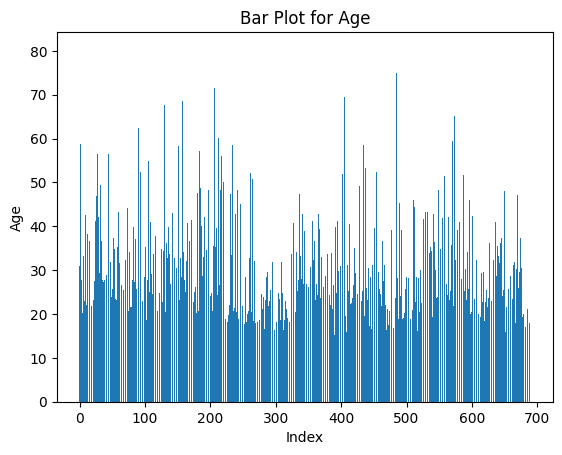

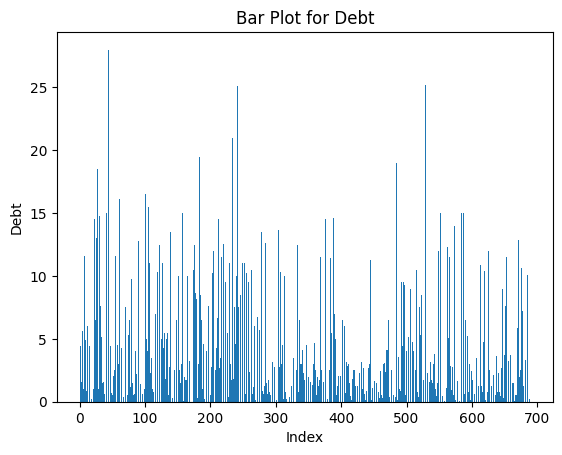

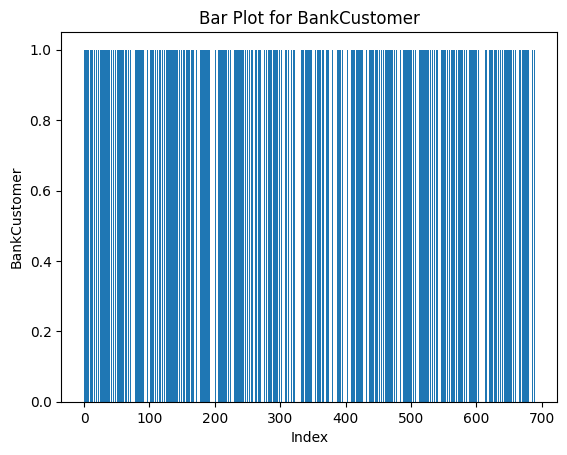

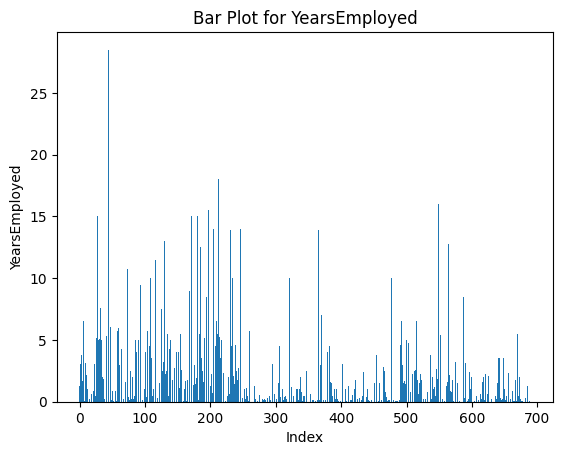

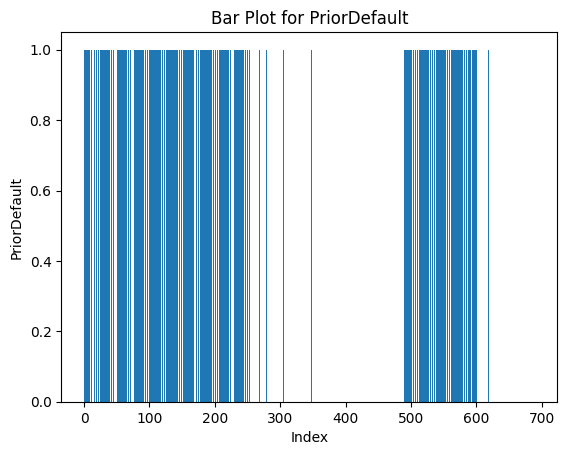

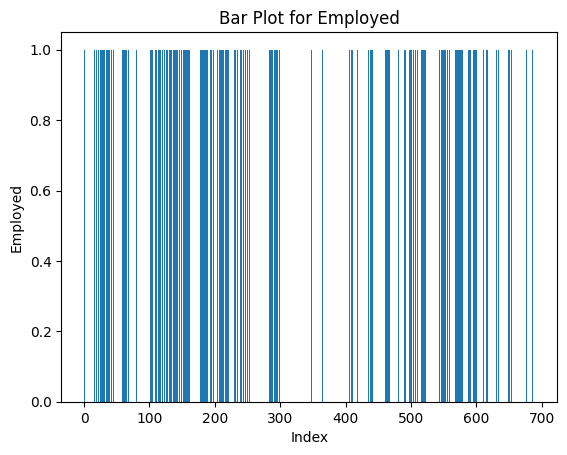

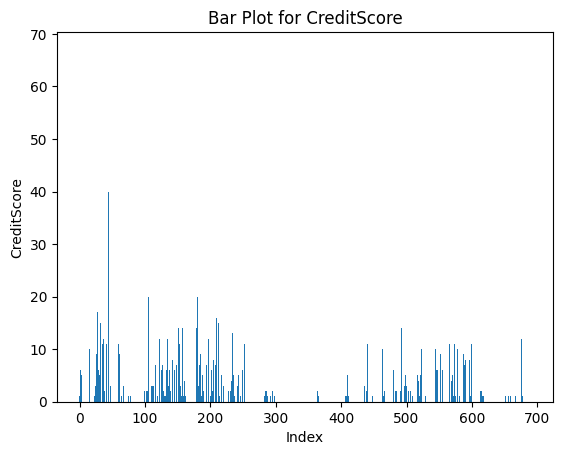

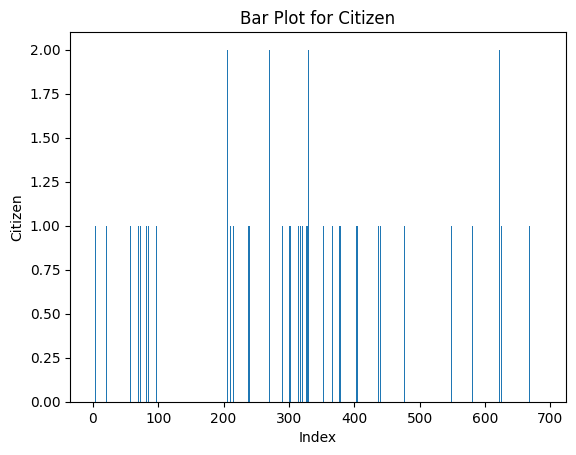

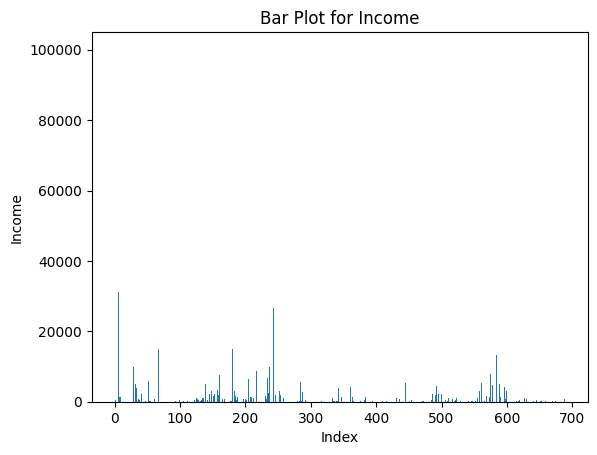

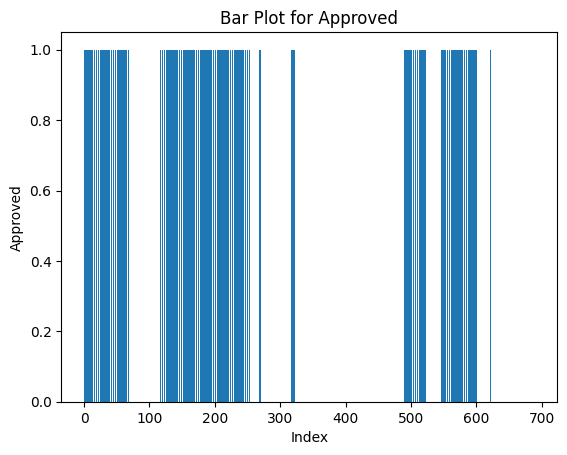

In [23]:
# Assuming you want to create bar plots for all columns (variables) in the dataset
for column in Credit_Card_Data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.bar(Credit_Card_Data.index, Credit_Card_Data[column])
    plt.xlabel('Index')  # You can customize the x-axis label here
    plt.ylabel(column)   # Use the column name as the y-axis label
    plt.title(f'Bar Plot for {column}')  # Set the title for each plot
    plt.show()

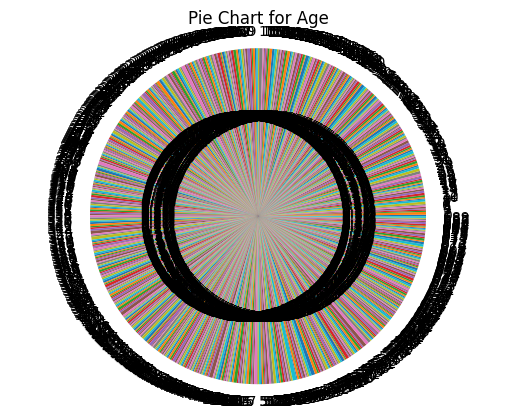

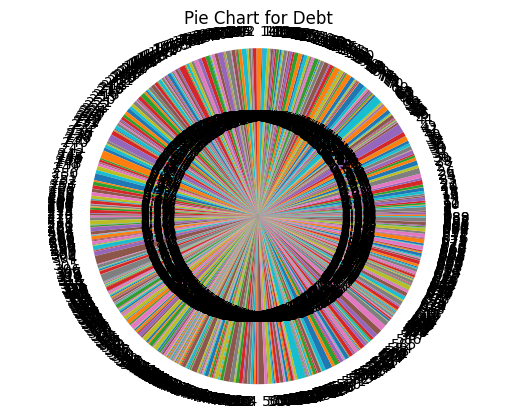

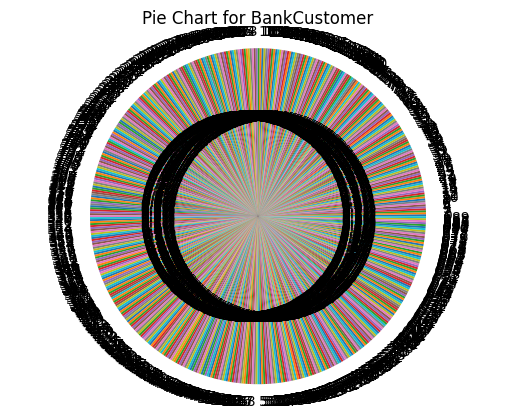

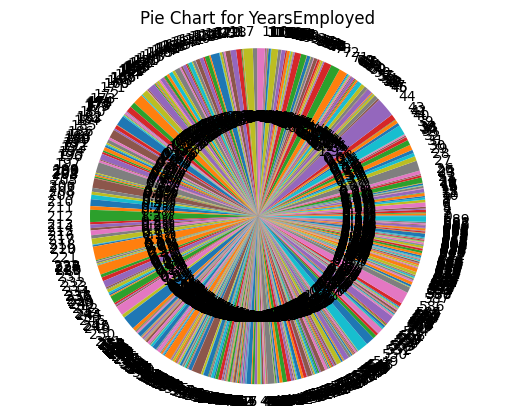

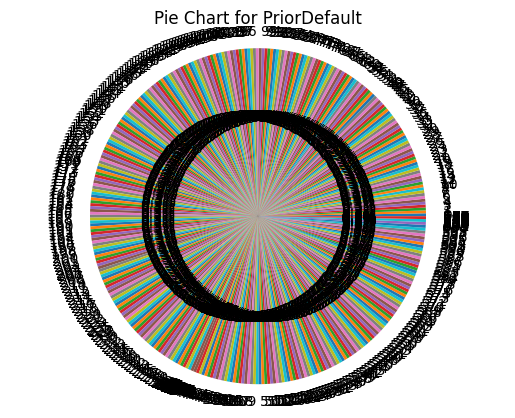

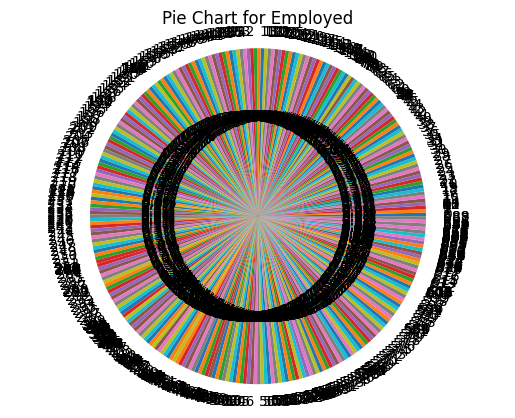

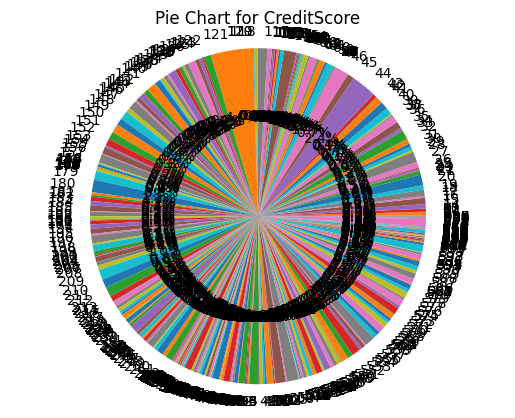

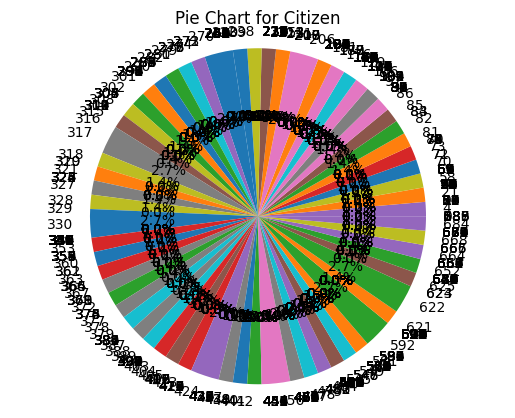

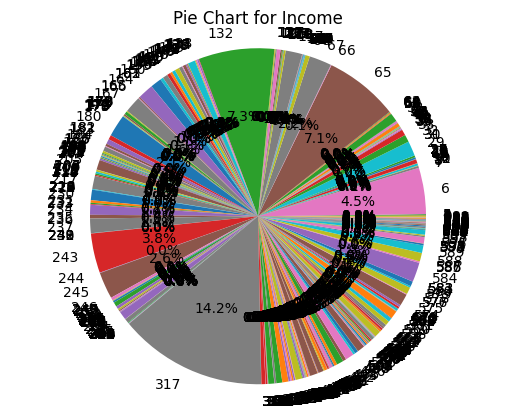

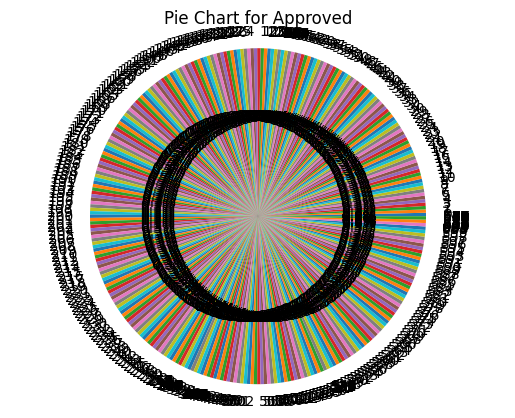

In [24]:
# Assuming you want to create pie charts for all columns (variables) in the dataset
for column in Credit_Card_Data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.pie(Credit_Card_Data[column], labels=Credit_Card_Data.index, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Pie Chart for {column}')  # Set the title for each plot
    plt.show()

In [25]:
#Identify the variables to normalize with minmaxscalar

cols = ['Age','Debt','YearsEmployed','CreditScore', 'Income']

In [28]:
#identify the independent and target (dependent) variables

Indepvar=[]
for col in Credit_Card_Data.columns:
    if col!='Approved':
        Indepvar.append(col)
targetvar='Approved'
x=Credit_Card_Data[Indepvar]
y=Credit_Card_Data[targetvar]

In [29]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 9), (207, 9), (483,), (207,))

In [30]:
#Shape

Credit_Card_Data.shape

(690, 10)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

In [32]:
x_train

Age      Debt  BankCustomer  YearsEmployed  PriorDefault  Employed  \
178  0.074127  0.351244             1        0.06050             1         1   
265  0.052857  0.003228             0        0.00200             0         0   
352  0.138889  0.436681             0        0.07500             0         0   
529  0.468254  0.957281             1        0.01050             1         1   
409  0.052857  0.009493             1        0.01675             0         1   
..        ...       ...           ...            ...           ...       ...   
71   0.334603  0.151889             1        0.62500             1         0   
106  0.238095  0.044238             1        0.02500             1         0   
270  0.378254  0.000000             1        0.00000             0         0   
435  0.083333  0.000000             0        0.00000             0         1   
102  0.078095  0.189861             1        0.01875             1         1   

     CreditScore  Citizen   Income  
178     0.059701        0  0.00540  
265     0.000000        0  0.00722  
352     0.000000        0  0.04000  
529     0.014925        0  0.00090  
409     0.059701        0  0.00008  
..           ...      ...      ...  
71      0.000000        0  0.00000  
106     0.000000        1  0.00000  
270     0.000000        2  0.00000  
435     0.059701        0  0.00001  
102     0.029851        0  0.00038  

[483 rows x 9 columns]

In [33]:
#Load the result for KNN

KNN_Results = pd.read_csv(r"/content/KNN_Results.csv",header=0)

KNN_Results.head()

Empty DataFrame
Columns: [Model Name, KNN K Value, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[76 21]
 [20 90]]
Outcome values : 
 76 21 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.78      0.79        97
           0       0.81      0.82      0.81       110

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.80      0.80      0.80       207

Accuracy : 80.2 %
Precision : 79.2 %
Recall : 78.4 %
F1 Score : 0.788
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 80.1 %
MCC : 0.602
roc_auc_score: 0.801


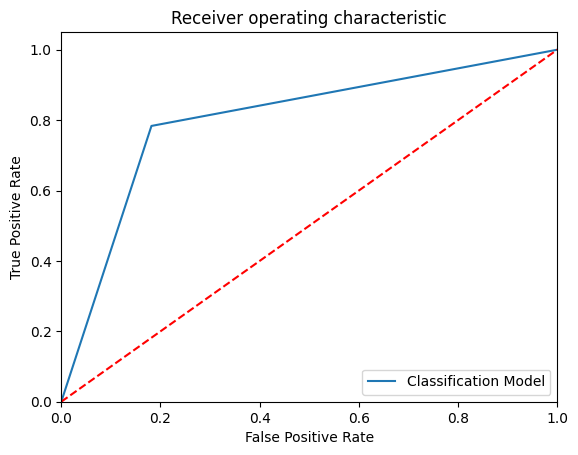

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 65  32]
 [  9 101]]
Outcome values : 
 65 32 9 101
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.67      0.76        97
           0       0.76      0.92      0.83       110

    accuracy                           0.80       207
   macro avg       0.82      0.79      0.80       207
weighted avg       0.82      0.80      0.80       207

Accuracy : 80.2 %
Precision : 87.8 %
Recall : 67.0 %
F1 Score : 0.76
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 79.4 %
MCC : 0.613
roc_auc_score: 0.794


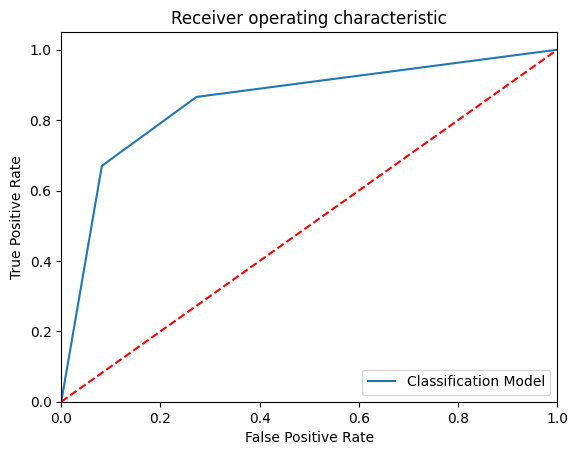

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[80 17]
 [14 96]]
Outcome values : 
 80 17 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.84        97
           0       0.85      0.87      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 85.1 %
Recall : 82.5 %
F1 Score : 0.838
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 84.9 %
MCC : 0.699
roc_auc_score: 0.849


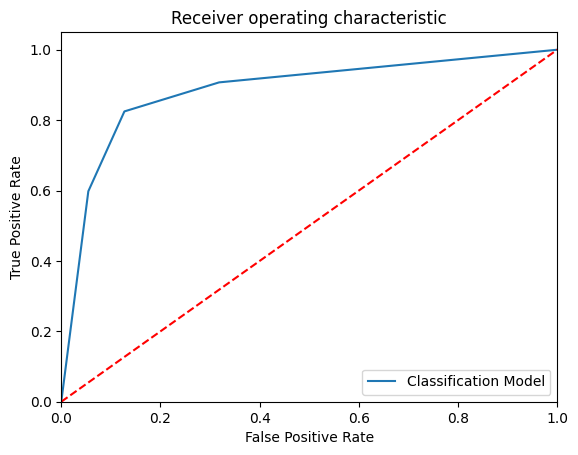

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 72  25]
 [  9 101]]
Outcome values : 
 72 25 9 101
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.74      0.81        97
           0       0.80      0.92      0.86       110

    accuracy                           0.84       207
   macro avg       0.85      0.83      0.83       207
weighted avg       0.84      0.84      0.83       207

Accuracy : 83.6 %
Precision : 88.9 %
Recall : 74.2 %
F1 Score : 0.809
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 83.0 %
MCC : 0.675
roc_auc_score: 0.83


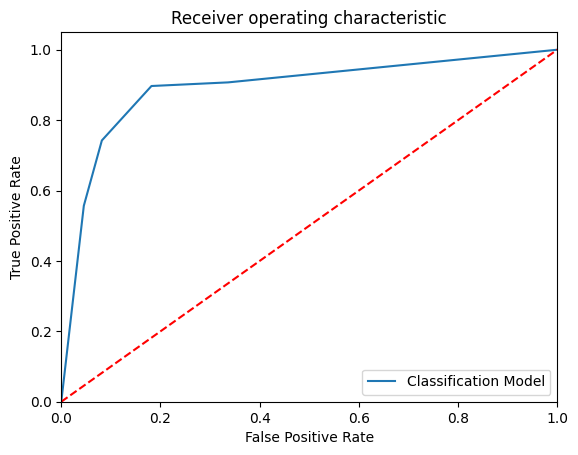

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[80 17]
 [14 96]]
Outcome values : 
 80 17 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.84        97
           0       0.85      0.87      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 85.1 %
Recall : 82.5 %
F1 Score : 0.838
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 84.9 %
MCC : 0.699
roc_auc_score: 0.849


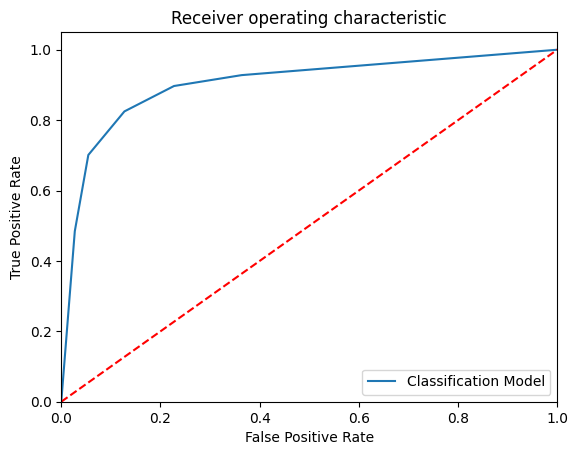

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 76  21]
 [ 10 100]]
Outcome values : 
 76 21 10 100
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.78      0.83        97
           0       0.83      0.91      0.87       110

    accuracy                           0.85       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 88.4 %
Recall : 78.4 %
F1 Score : 0.831
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 84.6 %
MCC : 0.701
roc_auc_score: 0.846


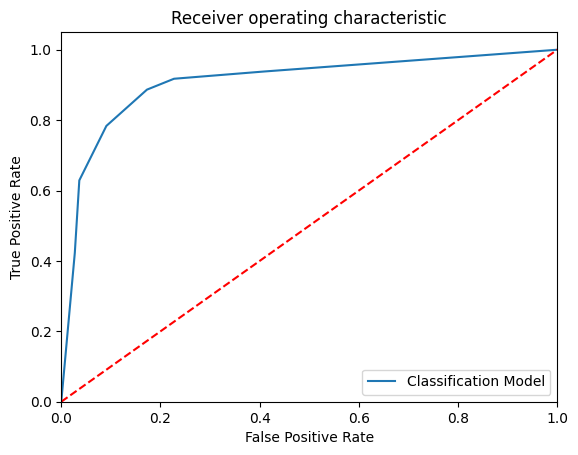

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[82 15]
 [15 95]]
Outcome values : 
 82 15 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.85      0.85        97
           0       0.86      0.86      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 84.5 %
Recall : 84.5 %
F1 Score : 0.845
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 85.4 %
MCC : 0.709
roc_auc_score: 0.854


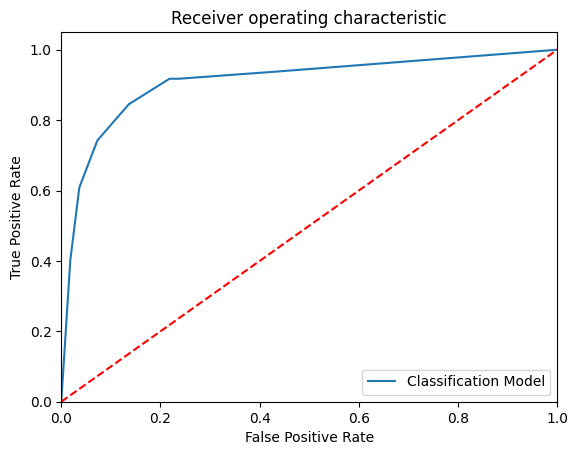

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[79 18]
 [11 99]]
Outcome values : 
 79 18 11 99
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.81      0.84        97
           0       0.85      0.90      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 87.8 %
Recall : 81.4 %
F1 Score : 0.845
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 85.7 %
MCC : 0.719
roc_auc_score: 0.857


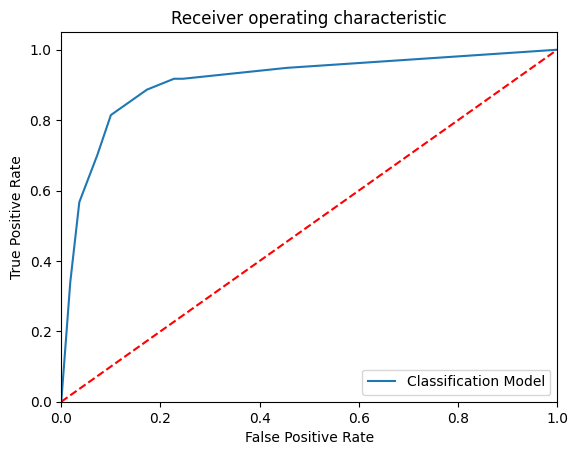

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[83 14]
 [12 98]]
Outcome values : 
 83 14 12 98
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.86      0.86        97
           0       0.88      0.89      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy : 87.4 %
Precision : 87.4 %
Recall : 85.6 %
F1 Score : 0.865
Specificity or True Negative Rate : 89.1 %
Balanced Accuracy : 87.4 %
MCC : 0.748
roc_auc_score: 0.873


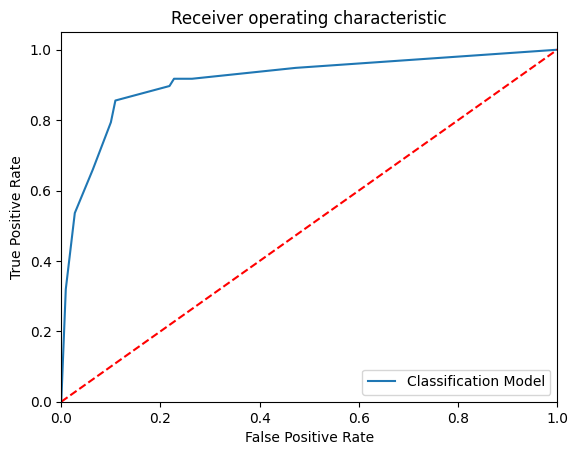

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[82 15]
 [12 98]]
Outcome values : 
 82 15 12 98
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.85      0.86        97
           0       0.87      0.89      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy : 87.0 %
Precision : 87.2 %
Recall : 84.5 %
F1 Score : 0.859
Specificity or True Negative Rate : 89.1 %
Balanced Accuracy : 86.8 %
MCC : 0.738
roc_auc_score: 0.868


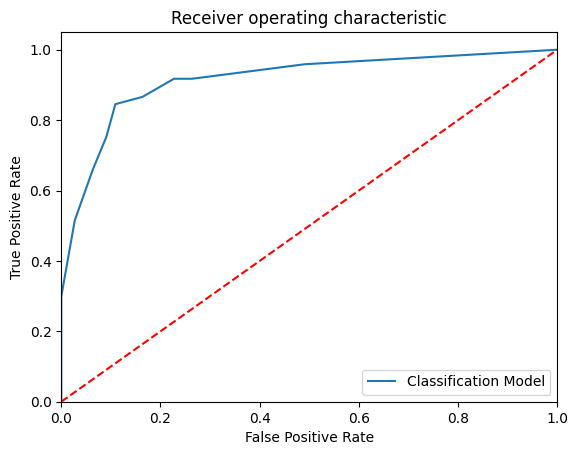

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[84 13]
 [16 94]]
Outcome values : 
 84 13 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.87      0.85        97
           0       0.88      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 84.0 %
Recall : 86.6 %
F1 Score : 0.853
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 86.0 %
MCC : 0.72
roc_auc_score: 0.86


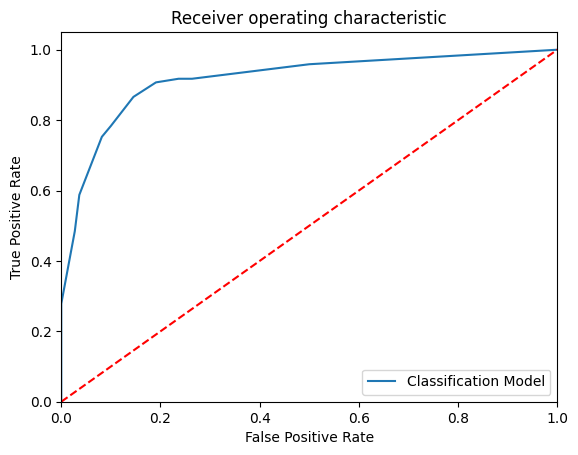

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[79 18]
 [14 96]]
Outcome values : 
 79 18 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.81      0.83        97
           0       0.84      0.87      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 84.9 %
Recall : 81.4 %
F1 Score : 0.832
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 84.3 %
MCC : 0.689
roc_auc_score: 0.844


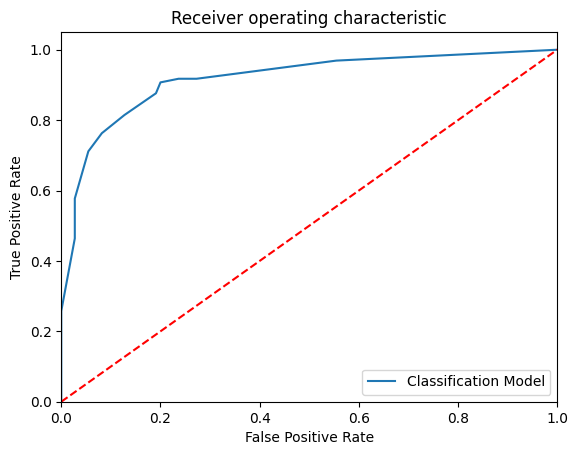

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[83 14]
 [18 92]]
Outcome values : 
 83 14 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84        97
           0       0.87      0.84      0.85       110

    accuracy                           0.85       207
   macro avg       0.84      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 82.2 %
Recall : 85.6 %
F1 Score : 0.838
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 84.6 %
MCC : 0.691
roc_auc_score: 0.846


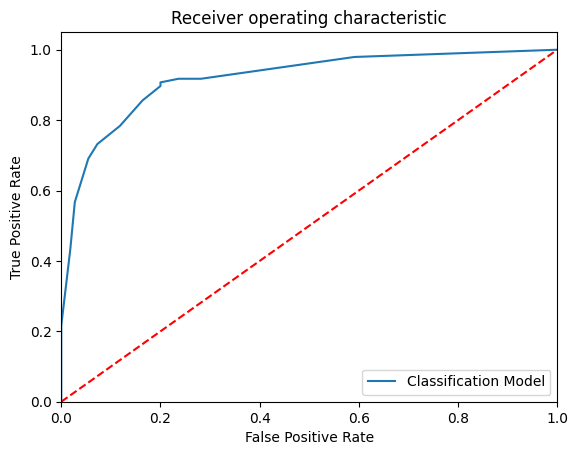

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[81 16]
 [14 96]]
Outcome values : 
 81 16 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.84      0.84        97
           0       0.86      0.87      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Accuracy : 85.5 %
Precision : 85.3 %
Recall : 83.5 %
F1 Score : 0.844
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 85.4 %
MCC : 0.709
roc_auc_score: 0.854


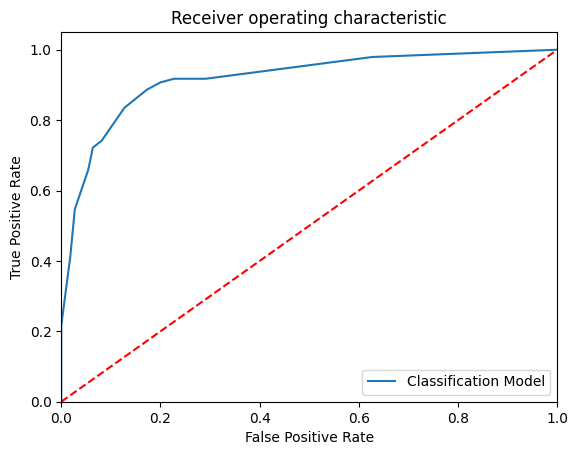

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[83 14]
 [18 92]]
Outcome values : 
 83 14 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84        97
           0       0.87      0.84      0.85       110

    accuracy                           0.85       207
   macro avg       0.84      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 82.2 %
Recall : 85.6 %
F1 Score : 0.838
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 84.6 %
MCC : 0.691
roc_auc_score: 0.846


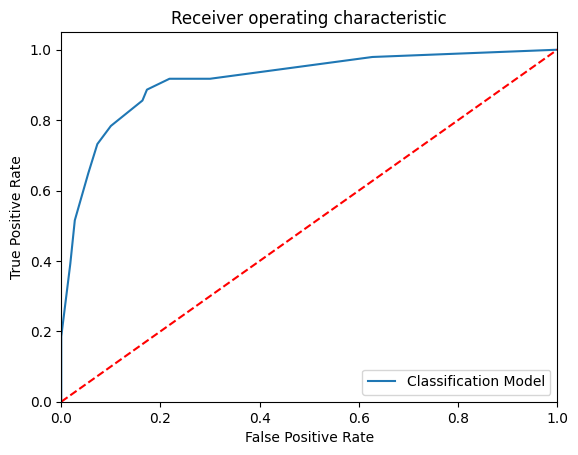

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[79 18]
 [14 96]]
Outcome values : 
 79 18 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.81      0.83        97
           0       0.84      0.87      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 84.9 %
Recall : 81.4 %
F1 Score : 0.832
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 84.3 %
MCC : 0.689
roc_auc_score: 0.844


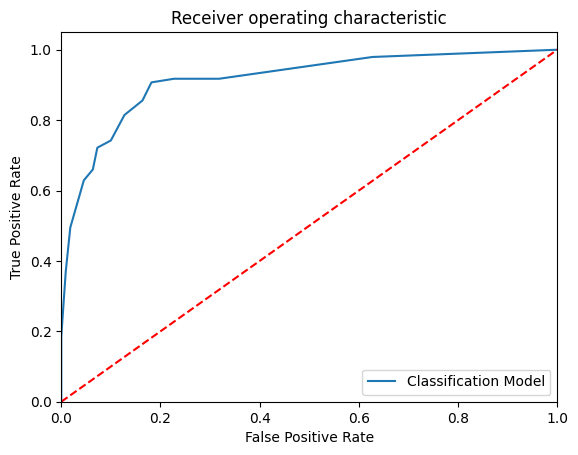

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[82 15]
 [16 94]]
Outcome values : 
 82 15 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.85      0.84        97
           0       0.86      0.85      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 83.7 %
Recall : 84.5 %
F1 Score : 0.841
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 85.0 %
MCC : 0.7
roc_auc_score: 0.85


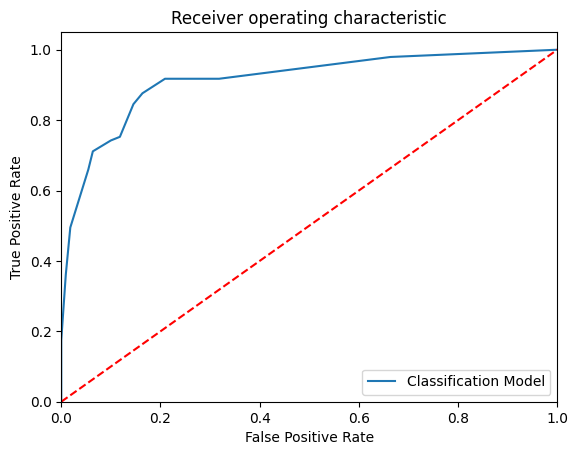

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[81 16]
 [14 96]]
Outcome values : 
 81 16 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.84      0.84        97
           0       0.86      0.87      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Accuracy : 85.5 %
Precision : 85.3 %
Recall : 83.5 %
F1 Score : 0.844
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 85.4 %
MCC : 0.709
roc_auc_score: 0.854


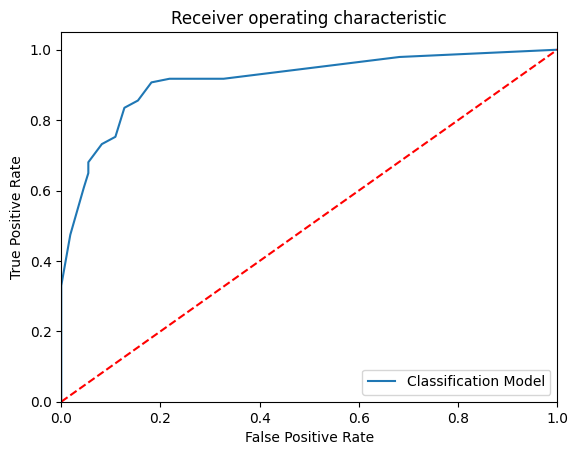

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[83 14]
 [16 94]]
Outcome values : 
 83 14 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.86      0.85        97
           0       0.87      0.85      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 83.8 %
Recall : 85.6 %
F1 Score : 0.847
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 85.5 %
MCC : 0.709
roc_auc_score: 0.855


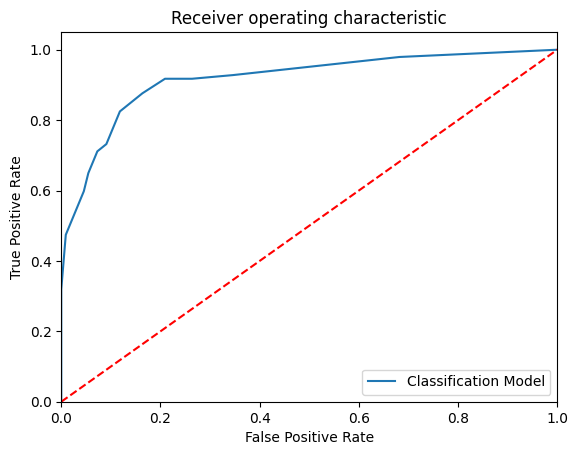

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[81 16]
 [15 95]]
Outcome values : 
 81 16 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.84      0.84        97
           0       0.86      0.86      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 84.4 %
Recall : 83.5 %
F1 Score : 0.839
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 84.9 %
MCC : 0.699
roc_auc_score: 0.849


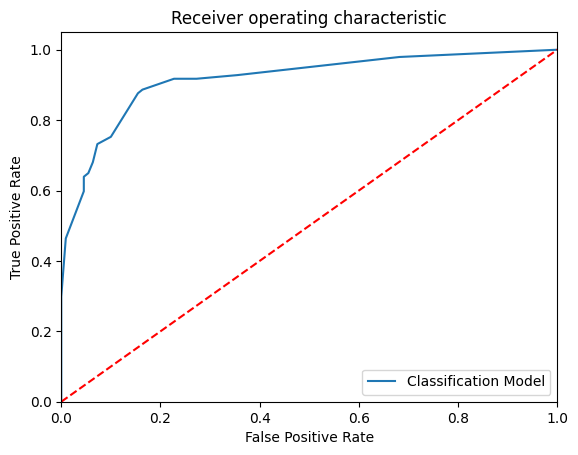

In [34]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
new_row_df = pd.DataFrame([new_row])
KNN_Results = pd.concat([KNN_Results, new_row_df], ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [36]:
#Display KNN Results

KNN_Results

Model Name KNN K Value True_Positive  \
0  KNeighborsClassifier(n_neighbors=20)          20            81   

  False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0             16             15            95      0.85      0.844   0.835   

   F1 Score  Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0     0.839        0.864  0.699       0.849344              0.849

# SVM Algorithm

In [37]:
#Loading out empty file

EMResults1 = pd.read_csv(r"/content/KNN_Results.csv",header=0)

Model Name:  SVM - Linear
Confusion matrix : 
 [[89  8]
 [25 85]]
Outcome values : 
 89 8 25 85
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.92      0.84        97
           0       0.91      0.77      0.84       110

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 78.1 %
Recall : 91.8 %
F1 Score : 0.844
Specificity or True Negative Rate : 77.3 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.845


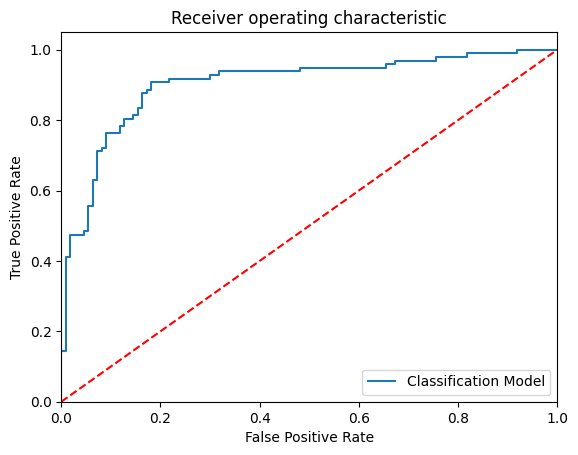

-----------------------------------------------------------------------------------------------------


In [38]:


#SVM-linear
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1.loc[len(EMResults1)] = new_row
#-------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[86 11]
 [21 89]]
Outcome values : 
 86 11 21 89
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84        97
           0       0.89      0.81      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 80.4 %
Recall : 88.7 %
F1 Score : 0.843
Specificity or True Negative Rate : 80.9 %
Balanced Accuracy : 84.8 %
MCC : 0.695
roc_auc_score: 0.848


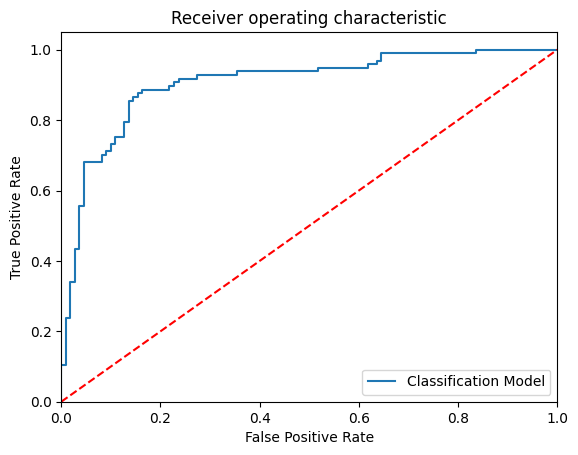

-----------------------------------------------------------------------------------------------------


In [39]:
#SVM-poly

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1.loc[len(EMResults1)] = new_row
#-----------------------------------------------------------------------------------------------

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[89  8]
 [26 84]]
Outcome values : 
 89 8 26 84
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.92      0.84        97
           0       0.91      0.76      0.83       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 83.6 %
Precision : 77.4 %
Recall : 91.8 %
F1 Score : 0.84
Specificity or True Negative Rate : 76.4 %
Balanced Accuracy : 84.1 %
MCC : 0.684
roc_auc_score: 0.841


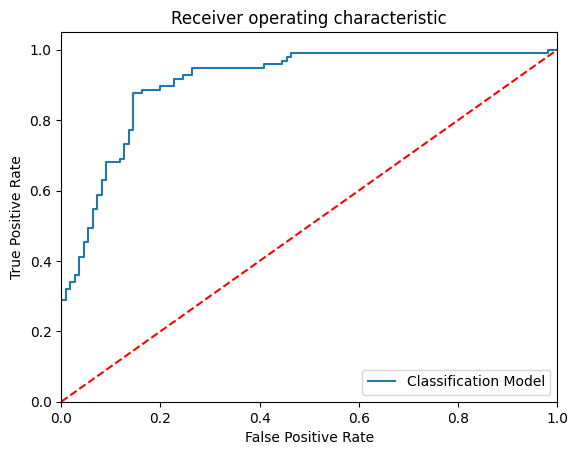

-----------------------------------------------------------------------------------------------------


In [40]:
#SVM-rbf

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name

print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1.loc[len(EMResults1)] = new_row
#---------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[67 30]
 [41 69]]
Outcome values : 
 67 30 41 69
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.69      0.65        97
           0       0.70      0.63      0.66       110

    accuracy                           0.66       207
   macro avg       0.66      0.66      0.66       207
weighted avg       0.66      0.66      0.66       207

Accuracy : 65.7 %
Precision : 62.0 %
Recall : 69.1 %
F1 Score : 0.654
Specificity or True Negative Rate : 62.7 %
Balanced Accuracy : 65.9 %
MCC : 0.318
roc_auc_score: 0.659


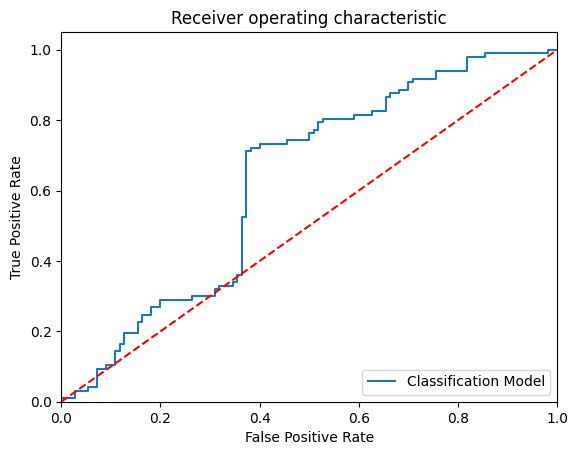

-----------------------------------------------------------------------------------------------------


In [41]:
#SVM-sigmoid


# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1.loc[len(EMResults1)] = new_row
#-----------------------------------------------------------------------------------------------------------

In [42]:
EMResults1

Model Name  KNN K Value  True_Positive  False_Negative  \
0       SVM - Linear          NaN             89               8   
1  SVM - Polynominal          NaN             86              11   
2     SVM - Gaussian          NaN             89               8   
3      SVM - Sigmoid          NaN             67              30   

   False_Positive  True_Negative  Accuracy  Precision  Recall  F1 Score  \
0              25             85     0.841      0.781   0.918     0.844   
1              21             89     0.845      0.804   0.887     0.843   
2              26             84     0.836      0.774   0.918     0.840   
3              41             69     0.657      0.620   0.691     0.654   

   Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0        0.773  0.692       0.845127              0.846  
1        0.809  0.695       0.847844              0.848  
2        0.764  0.684       0.840581              0.841  
3        0.627  0.318       0.658997              0.659

# Comparing the algorithms

In [43]:
Result = pd.read_csv(r"/content/EMResults.csv")
Result

Empty DataFrame
Columns: [Model Name, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

Model Name:  LogisticRegression()
Confusion matrix : 
 [[87 10]
 [23 87]]
Outcome values : 
 87 10 23 87
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.90      0.84        97
           0       0.90      0.79      0.84       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 79.1 %
Recall : 89.7 %
F1 Score : 0.841
Specificity or True Negative Rate : 79.1 %
Balanced Accuracy : 84.4 %
MCC : 0.688
roc_auc_score: 0.844


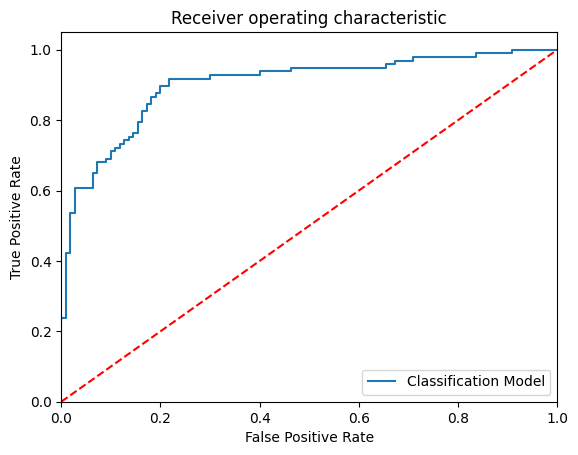

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[81 16]
 [13 97]]
Outcome values : 
 81 16 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.84      0.85        97
           0       0.86      0.88      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 86.2 %
Recall : 83.5 %
F1 Score : 0.848
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 85.8 %
MCC : 0.718
roc_auc_score: 0.858


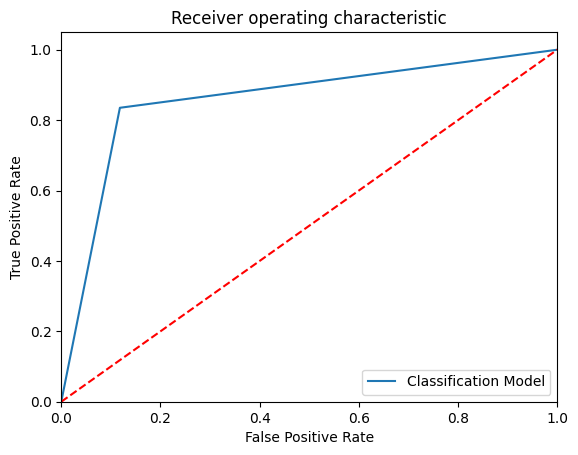

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[84 13]
 [14 96]]
Outcome values : 
 84 13 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.87      0.86        97
           0       0.88      0.87      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy : 87.0 %
Precision : 85.7 %
Recall : 86.6 %
F1 Score : 0.862
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 86.9 %
MCC : 0.738
roc_auc_score: 0.869


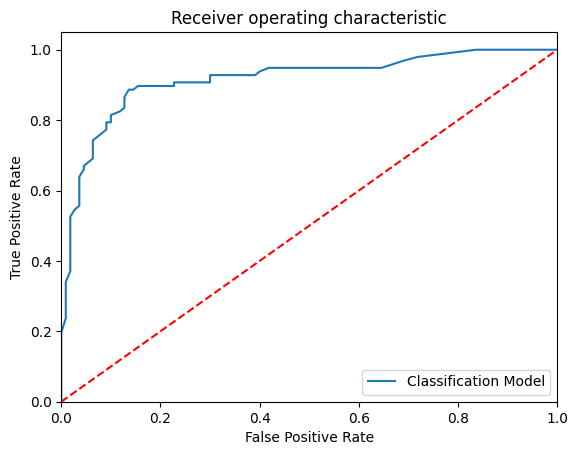

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[85 12]
 [13 97]]
Outcome values : 
 85 12 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.88      0.87        97
           0       0.89      0.88      0.89       110

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207

Accuracy : 87.9 %
Precision : 86.7 %
Recall : 87.6 %
F1 Score : 0.872
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.9 %
MCC : 0.758
roc_auc_score: 0.879


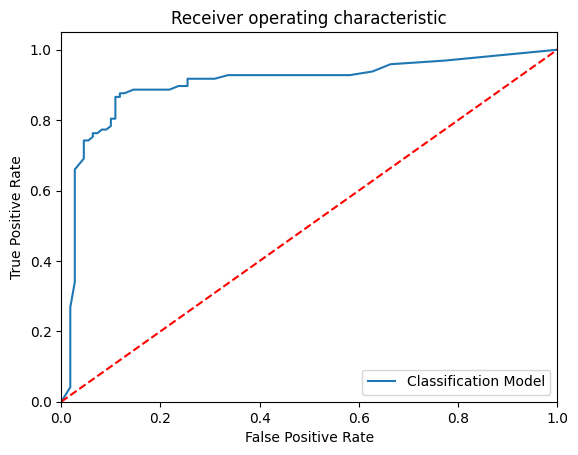

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[81 16]
 [15 95]]
Outcome values : 
 81 16 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.84      0.84        97
           0       0.86      0.86      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 84.4 %
Recall : 83.5 %
F1 Score : 0.839
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 84.9 %
MCC : 0.699
roc_auc_score: 0.849


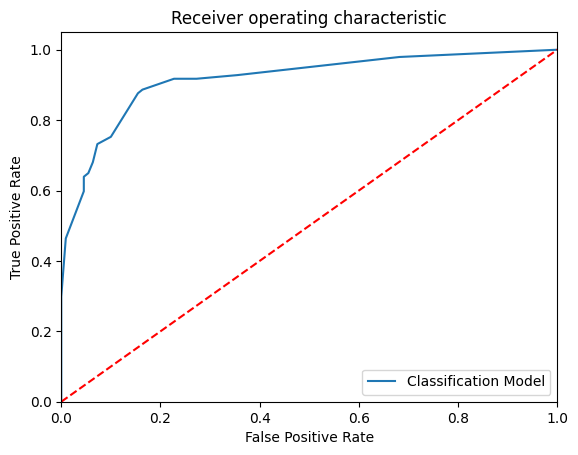

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[86 11]
 [21 89]]
Outcome values : 
 86 11 21 89
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84        97
           0       0.89      0.81      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 80.4 %
Recall : 88.7 %
F1 Score : 0.843
Specificity or True Negative Rate : 80.9 %
Balanced Accuracy : 84.8 %
MCC : 0.695
roc_auc_score: 0.848


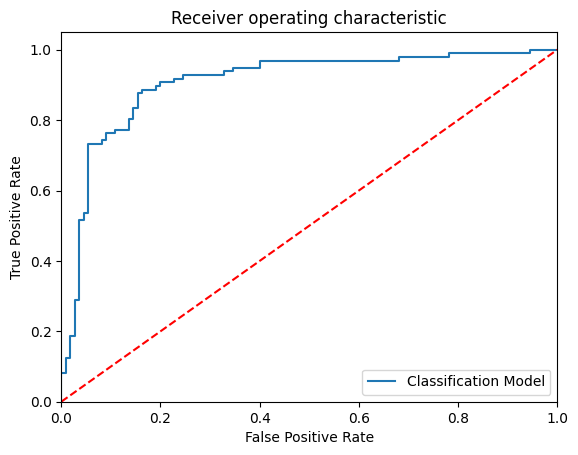

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[64 33]
 [11 99]]
Outcome values : 
 64 33 11 99
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.66      0.74        97
           0       0.75      0.90      0.82       110

    accuracy                           0.79       207
   macro avg       0.80      0.78      0.78       207
weighted avg       0.80      0.79      0.78       207

Accuracy : 78.7 %
Precision : 85.3 %
Recall : 66.0 %
F1 Score : 0.744
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 78.0 %
MCC : 0.581
roc_auc_score: 0.78


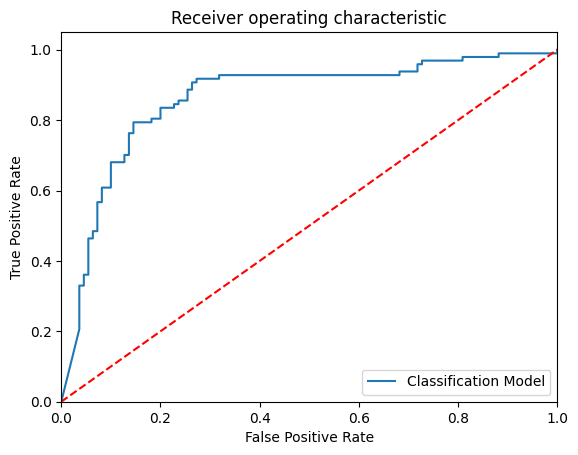

-----------------------------------------------------------------------------------------------------


In [44]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Result.loc[len(Result)] = new_row
    #----------------------------------------------------------------------------------------------------------

In [50]:
#Result with comparing all the agorithms

Result.head(10)

Model Name  True_Positive  \
0                               LogisticRegression()             87   
1                           DecisionTreeClassifier()             81   
2  (DecisionTreeClassifier(max_features='sqrt', r...             84   
3  (ExtraTreeClassifier(random_state=516572554), ...             85   
4               KNeighborsClassifier(n_neighbors=20)             81   
5  SVC(class_weight='balanced', kernel='poly', pr...             86   
6                                       GaussianNB()             64   

   False_Negative  False_Positive  True_Negative  Accuracy  Precision  Recall  \
0              10              23             87     0.841      0.791   0.897   
1              16              13             97     0.860      0.862   0.835   
2              13              14             96     0.870      0.857   0.866   
3              12              13             97     0.879      0.867   0.876   
4              16              15             95     0.850      0.844   0.835   
5              11              21             89     0.845      0.804   0.887   
6              33              11             99     0.787      0.853   0.660   

   F1 Score  Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0     0.841        0.791  0.688       0.843908              0.844  
1     0.848        0.882  0.718       0.858435              0.858  
2     0.862        0.873  0.738       0.869353              0.869  
3     0.872        0.882  0.758       0.879053              0.879  
4     0.839        0.864  0.699       0.849344              0.849  
5     0.843        0.809  0.695       0.847844              0.848  
6     0.744        0.900  0.581       0.779897              0.780

In [46]:
#predict the values with rf algorithms
y_predDC=ModelDC.predict(x_test)

In [47]:
Results = pd.DataFrame({'Approved_A':y_test, 'Approved_P':y_predDC})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Credit_Card_copy.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

Gender    Age    Debt  Married  BankCustomer               Industry  \
86        1  28.46   0.375        1             1            Real Estate   
145       1  32.83   2.500        1             1  InformationTechnology   
671       1  25.83  12.835        1             1  InformationTechnology   
192       1  41.75   0.960        1             1              Utilities   
576       1  30.17   0.500        1             1                 Energy   

    Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
86      White          0.875             1         0            0   
145     Black          2.750             1         1            6   
671     White          0.500             0         0            0   
192     White          2.500             1         0            0   
576     White          1.750             1         1           11   

     DriversLicense       Citizen  ZipCode  Income  Approved  Approved_A  \
86                1  ByOtherMeans      928       0         0           0   
145               0       ByBirth      160    2072         1           1   
671               0       ByBirth        0       2         0           0   
192               0       ByBirth      510     600         1           1   
576               0       ByBirth       32     540         1           1   

     Approved_P  
86            0  
145           1  
671           0  
192           1  
576           1

In [48]:
# Display 5 records randomly
ResultsFinal.sample(5)

Gender    Age    Debt  Married  BankCustomer               Industry  \
361       1  23.08   2.500        1             1             Healthcare   
256       1  20.00  11.045        1             1                 Energy   
658       0  15.75   0.375        1             1                 Energy   
381       0  22.67   7.000        1             1                 Energy   
652       0  22.50   0.415        1             1  ConsumerDiscretionary   

    Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
361    Latino          0.085             0         0            0   
256     White          2.000             0         0            0   
658     White          1.000             0         0            0   
381     White          0.165             0         0            0   
652     White          0.335             0         0            0   

     DriversLicense       Citizen  ZipCode  Income  Approved  Approved_A  \
361               1       ByBirth      100    4208         0           0   
256               1       ByBirth      136       0         0           0   
658               0       ByBirth      120      18         0           0   
381               0       ByBirth      160       0         0           0   
652               1  ByOtherMeans      144       0         0           0   

     Approved_P  
361           0  
256           0  
658           0  
381           0  
652           0